# Importation des librairies et modules d'analyse de données

In [8]:
# lecture du fichier 01c.csv (colones de données séparées par virgule; la première et la dernière ligne sont ignorées; toute les données sont transférées dans la variable data
# from pylab import *              # librairie matématique : on l'importe en ploc pour ne pas à avoir à mettre des préfixe sur les fonctions mathématiques de base
import os, fnmatch
from scipy.special import gamma  # fonction gamma
from scipy.stats import weibull_min  # distribution de Weibull
from scipy.stats import norm  # distribution gaussienne (normale)
from scipy import stats  # entre autre, distribution chi2 (.cdf pour p-value)
import pandas as pd  # fonction d'importation de routine pour traitement de donnée
from scipy.optimize import (
    curve_fit,
)  # fonction optimisation d'ajustement paR Levenberg-Marquardt
import numpy as np  # librairie numérique de base permettant de manipuler matrices et vecteurs comme en MatLab
import matplotlib.pyplot as plt  # librairie de génération de graphiques

plt.rcParams["axes.grid"] = True
# plt.rcParams["text.usetex"] = True
# Configuration des options d'affichage du tableau latex de sortie
# pd.set_option("display.latex.longtable", True)
# pd.set_option("display.latex.escape", False)

In [9]:
# I_reel = np.arange(0.2, 1.1, 0.1)
# K = 0.048
# W = 6.299213  # 6.299213  # 160e-6 in mumeter
# H = 1.3779528  # 1.3779528  # 35e-6

# DT_exp = 0.44
# Asp_Rat_exp = 0.725

# DT = (I_reel / (K * ((W * H) ** 0.725))) ** (1 / DT_exp)
# Top = 15 * (I_reel / 0.7) ** 2
# I = K*DT^{0.44}*(W*H)^{0.725}
# print(DT)


# plt.figure()
# plt.plot(I_reel, DT, "*", label="$T = f(I)$")
# plt.plot(I_reel, Top, "*", label="$T = f(I)$")
# plt.xlabel("I/A")
# plt.ylabel("DeltaT/°C")
# plt.grid(True)
# plt.legend()
# plt.show
def eval_fit(ydata, ysigma, yfit, nb_par):  # fonction d'évaluation de l'ajustement :
    #   ydata : données expérimentales
    #   ysigma : incertitude sur les données expérimentales
    #   yfit : onm de la fonction d'ajustement
    #   nb_par : nombre de paramètres de la fonction d'ajustement
    Val_chi2 = sum(((ydata - yfit) / ysigma) ** 2)  # calcul du Chi2
    Val_chi2_red = Val_chi2 / (np.size(ydata) - nb_par)  # calcul du chi2 réduit
    p_value = stats.chi2.cdf(Val_chi2, np.size(ydata) - nb_par)  # calcul de la valeur p
    return Val_chi2, Val_chi2_red, p_value

# Ajustement Singulier des courbes de $\Delta\Theta\left(t\right)$

Delta T is : 1.3999999999999986
Temp operationnel is : 1.0285714285714278
Tau = 93.12292242176606, T amb = 23.2, DeltaT = 4.90907429355219
nan
nan
nan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


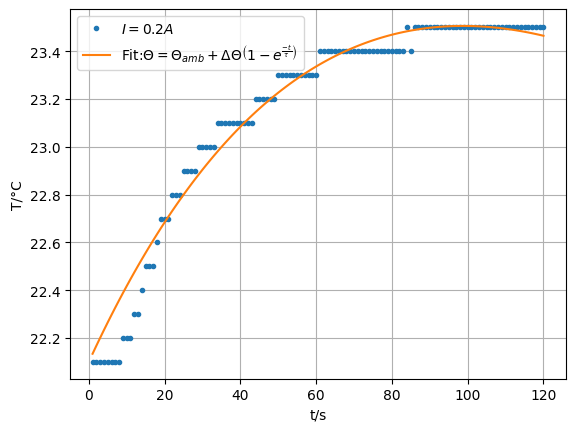

In [18]:
Amb0_2 = pd.read_csv("Donnees/Amb/Amb0_2A.csv", skiprows=10, sep=";")

Amb0_3 = pd.read_csv("Donnees/Amb/Amb0_3A.csv", skiprows=10, sep=";")

# Amb0_4 = pd.read_csv("Donnees/Amb0_4A.csv", skiprows=10, sep=";")

# Amb0_5 = pd.read_csv("Donnees/Amb0_5A.csv", skiprows=10, sep=";")

Amb0_6 = pd.read_csv("Donnees/Amb/Amb0_6A.csv", skiprows=10, sep=";")

Amb0_7 = pd.read_csv("Donnees/Amb/Amb0_7A.csv", skiprows=10, sep=";")

# Amb0_8 = pd.read_csv("Donnees/Amb0_8A.csv", skiprows=10, sep=";")

# Amb0_9 = pd.read_csv("Donnees/Amb0_9A.csv", skiprows=10, sep=";")

# Amb1_0 = pd.read_csv("Donnees/Amb1_0A.csv", skiprows=10, sep=";")

# T_Amb1_0 = Amb1_0["No."] * (1**2) * 1 + 22
DeltaT_06 = Amb0_2["CH 1"].max() - Amb0_2["CH 1"].min()
DeltaT_07 = Amb0_7["CH 1"].max() - Amb0_7["CH 1"].min()
DeltaT_03 = Amb0_3["CH 1"].max() - Amb0_3["CH 1"].min()

Tmin = Amb0_6["CH 1"].min()

TmaxMeas = Amb0_6["CH 1"].max()

Tmax = Amb0_6["CH 1"].min() + DeltaT_06

IMax = 0.7

TempOp = DeltaT_06 * ((0.6 / IMax) ** 2)


T_calc = Amb0_6["CH 1"].min() + 13.5 * (1 - (np.e ** (-Amb0_6["No."] / 40)))


print(f"Delta T is : {DeltaT_06}\nTemp operationnel is : {TempOp}")


# Choix de la fonction d'ajustement
def func(t, Delta_Tetha, Tau, Vararg):
    return Amb0_2["CH 1"].min() + Delta_Tetha * (1 - np.exp(-(t / Tau))) + Vararg * t


# Ajustement et affichage du fit
initial_guess = [DeltaT_06, 20]

popt, pcov = curve_fit(func, Amb0_2["No."], Amb0_2["CH 1"])

# Calcul de l'erreur
perr = np.sqrt(np.diag(pcov))

# Theta_amb_fit = popt[0]
Delta_Theta_fit = popt[0]
Tau_fit = popt[1]
Tim_arg = popt[2]
print(f"Tau = {Tau_fit}, T amb = {Tmin}, DeltaT = {Delta_Theta_fit}")
xfit = Amb0_2["No."]

yfit = func(xfit, Delta_Theta_fit, Tau_fit, Tim_arg)
Val_635_06 = (0.635 * DeltaT_06) + Amb0_6["CH 1"].min()

Val_635_07 = (0.635 * DeltaT_07) + Amb0_7["CH 1"].min()

f1_index = (
    Amb0_6["CH 1"]
    .index[
        (Amb0_6["CH 1"] > (0.635 * (DeltaT_06 + Amb0_6["CH 1"].min())) - 0.3)
        & (Amb0_6["CH 1"] < (0.635 * (DeltaT_06 + Amb0_6["CH 1"].min())) + 0.3)
    ]
    .tolist()
)

f2_index = (
    Amb0_7["CH 1"]
    .index[
        (Amb0_7["CH 1"] > (0.635 * (DeltaT_07 + Amb0_7["CH 1"].min())) - 0.3)
        & (Amb0_7["CH 1"] < (0.635 * (DeltaT_07 + Amb0_7["CH 1"].min())) + 0.3)
    ]
    .tolist()
)

f1 = Amb0_6["No."].iloc[f1_index]
f2 = Amb0_7["No."].iloc[f2_index]
# print(DeltaT_06, DeltaT_07, Val_635_06, Val_635_07, f1, f2)
plt.figure()

# plt.plot(Amb0_2["No."], Amb0_2["CH 1"], ".", label="$0.2A$")

# plt.plot(Amb0_3["No."], Amb0_3["CH 1"], ".", label="$0.3A$")

# plt.plot(Amb0_4["No."], Amb0_4["CH 1"], ".", label="$0.4A$")

# plt.plot(Amb0_5["No."], Amb0_5["CH 1"], ".", label="$0.5A$")

plt.plot(Amb0_2["No."], Amb0_2["CH 1"], ".", label="$I=0.2A$")
# plt.plot((Val_635_06, Val_635_06), (Amb0_6["CH 1"].min(), 36), "r--")
# plt.plot((Val_635_07, Val_635_07), (Amb0_7["CH 1"].min(), 36), "b--")
plt.plot(
    xfit,
    yfit,
    label=r"Fit:$\Theta = \Theta_{amb}+\Delta\Theta\left(1-e^{\frac{-t}{\tau}}\right)$",
)
ysigma = 0.8
" Appel de la fonction et affichage"
chi2, chi2_red, p = eval_fit(
    Amb0_6["CH 1"], ysigma, yfit, 2
)  # appel de la fonction eval_fit
print(chi2)
print(chi2_red)
print(p)

# plt.plot(Amb0_6["No."], T_calc, ".", label="$0.6A$")

# plt.plot(Amb0_7["No."], Amb0_7["CH 1"], ".", label="$0.7A$")

# plt.plot(Amb0_8["No."], Amb0_8["CH 1"], ".", label="$0.8A$")

# plt.plot(Amb0_9["No."], Amb0_9["CH 1"], ".", label="$0.9A$")

# plt.plot(Amb1_0["No."], Amb1_0["CH 1"], ".", label="$1A$")

# plt.plot(Amb1_0["No."], T_Amb1_0, ".", label="$1A$")

plt.xlabel("t/s")

plt.ylabel("T/°C")

plt.grid(True)

plt.legend()

plt.show


plt.savefig("Graphiques/Ex_T_de_S.eps")
plt.savefig("Graphiques/Ex_T_de_S.png")

# Regression de la courbe $R\left(t\right)$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.20921794866147414 0.20613999999999988 0.006891664932469624


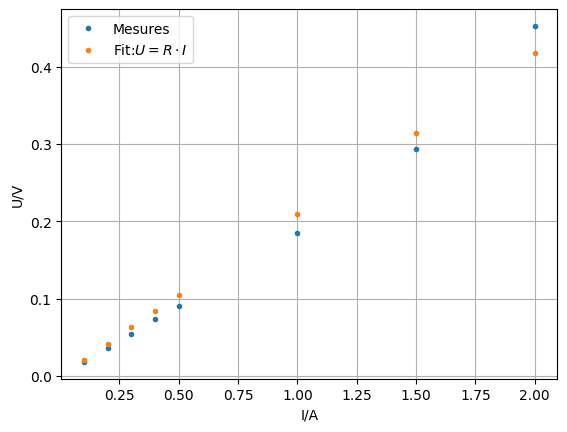

In [11]:
Res_temp = pd.DataFrame()
Res_temp["Tension/mV"] = [0.018, 0.036, 0.054, 0.073, 0.091, 0.185, 0.294, 0.453]

Res_temp["Courant/A"] = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2]

Pente = (0.453 - 0.018) / (2 - 0.1)

rho = 1.68e-8

alpha = 0.00393

R = 1

Temp = np.arange(-180, 20, 1)

R_predic = R * (1 + alpha * (-182 - 20))

R_Var = R * (1 + alpha * (Temp - 20))

P_Var = R_Var * ((0.5) ** 2)

P = 0.25

I = np.sqrt(P / R_Var)


# Choix de la fonction d'ajustement
def func_R(A, R):
    return R * A


# Ajustement et affichage du fit
initial_guess = [DeltaT_06, 20]

popt, pcov = curve_fit(func_R, Res_temp["Courant/A"], Res_temp["Tension/mV"])

# Calcul de l'erreur
perr = np.sqrt(np.diag(pcov))
y_R = func_R(Res_temp["Courant/A"], popt[0])

plt.figure()
# plt.plot(Amb0_2["No."], Amb0_2["CH 1"], ".", label="$0.2A$")
# plt.plot(Amb0_3["No."], Amb0_3["CH 1"], ".", label="$0.3A$")
# plt.plot(Amb0_4["No."], Amb0_4["CH 1"], ".", label="$0.4A$")
# plt.plot(Amb0_5["No."], Amb0_5["CH 1"], ".", label="$0.5A$")
# plt.plot(Res_temp["Courant/A"], Res_temp["Tension/mV"], ".", label="$0.6A$")
# plt.plot(Amb0_6["No."], T_calc, ".", label="$0.6A$")
# plt.plot(Amb0_7["No."], Amb0_7["CH 1"], ".", label="$0.7A$")
# plt.plot(Amb0_8["No."], Amb0_8["CH 1"], ".", label="$0.8A$")
# plt.plot(Amb0_9["No."], Amb0_9["CH 1"], ".", label="$0.9A$")
# plt.plot(Amb1_0["No."], Amb1_0["CH 1"], ".", label="$1A$")
# plt.plot(Amb1_0["No."], T_Amb1_0, ".", label="$1A$")
# plt.plot(Temp, R_Var, ".", label="$R = f(T)$")
plt.plot(Res_temp["Courant/A"], Res_temp["Tension/mV"], ".", label="Mesures")
plt.plot(Res_temp["Courant/A"], y_R, ".", label="Fit:$U=R\cdot I$")
# plt.plot(Temp, I, ".", label="$P = f(T)$")

plt.xlabel("I/A")
plt.ylabel("U/V")
plt.grid(True)
plt.legend()
plt.show
plt.savefig("Graphiques/R_Azote.eps")
plt.savefig("Graphiques/R_Azote.png")
print(popt[0], R_predic, perr[0])

# Régression automatisée des courbes $\Delta\Theta\left(t\right)$ à $\Theta_{ambiant}$

## On va chercher dans le dossier des données, l'ensemble des données

In [12]:
# Import of the strings of the files
# Path to files to import
path = "Donnees/Amb/"

filelist = os.listdir(path)
# On vérifie qu'on a la bonne liste
print(filelist)
# Création de la dataframe
df_list = []

# popt, pcov = curve_fit(func, Amb0_6["No."], Amb0_6["CH 1"])

# Calcul de l'erreur
# perr = np.sqrt(np.diag(pcov))

# Theta_amb_fit = popt[0]
# Delta_Theta_fit = popt[1]
# Tau_fit = popt[2]
# print(Tau_fit, Theta_amb_fit, Delta_Theta_fit)
# xfit = Amb0_6["No."]

# yfit = func(xfit, Theta_amb_fit, Delta_Theta_fit, Tau_fit)


# Choix de la fonction d'ajustement
def func(t, Theta_amb, Delta_Tetha, Tau):
    return Theta_amb + Delta_Tetha * (1 - np.exp((-t / Tau)))


# On met tout dans une liste d'array
for file in filelist:
    df_list.append(pd.read_csv(path + file, skiprows=10, sep=";"))

['Amb0_2A.csv', 'Amb0_3A.csv', 'Amb0_4A.csv', 'Amb0_5A.csv', 'Amb0_6A.csv', 'Amb0_7A.csv', 'Amb0_8A.csv', 'Amb0_9A.csv', 'Amb1_0A.csv']


## On effectue les régressions dans des boucles et on les affiches

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


120 120
176 176
275 275
276 276
234 234
252 252
259 259
234 234
261 261


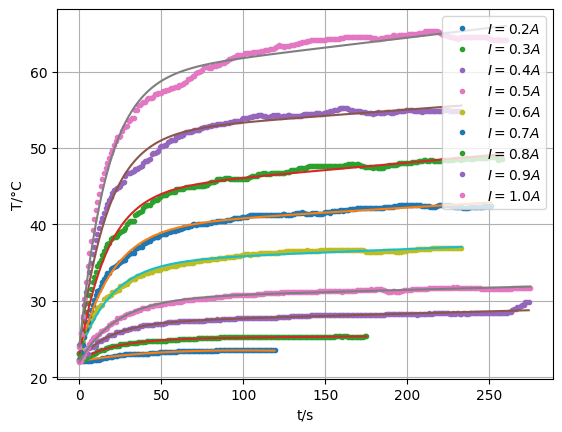

In [13]:
I_reel = np.arange(0.2, 1.1, 0.1)
Theta_amb_list = []

Theta_amb_Err_list = []


Theta_min_list = []


Delta_Theta_list = []


Delta_Theta_Err_list = []


Tau_list = []


Tau_Err_list = []


y_fit_list = []


Tau_63_list = []
Tm_cst_list = []
Tm_cst_Err_list = []

# On parcours les dataframes pour appliquer les opérations à la chaîne


for df in df_list:

    # print(df)

    # Ajustement et affichage du fit
    df.head()

    # Choix de la fonction d'ajustement
    def func_aj(t, Delta_Tetha, Tau, Tm_cst):
        return df["CH 1"].min() + Delta_Tetha * (1 - np.exp(-(t / Tau))) + Tm_cst * t

    DeltaT = df["CH 1"].max() - df["CH 1"].min()
    df["No."] -= df["No."].min()

    # df["CH 1"] -= df["CH 1"].min()

    initial_guess = [DeltaT, 50]

    popt, pcov = curve_fit(func_aj, df["No."], df["CH 1"])

    perr = np.sqrt(np.diag(pcov))

    # On cherche les indexs sur l'axe des abscisses à partir de la valeur des ordonnées

    Theta_min_list.append(df["CH 1"].min())

    # On sauvegarde les valeurs des coefficients dans des listes

    # Theta_amb_list.append(popt[0])

    # print(Delta_Theta_list)

    Delta_Theta_list.append(popt[0])

    Tau_list.append(popt[1])

    Tm_cst_list.append(popt[2])

    # On sauvegarde les erreurs des coefficients dans des listes

    # Theta_amb_Err_list.append(pcov[0])

    Delta_Theta_Err_list.append(pcov[0])

    Tau_Err_list.append(pcov[1])
    Tm_cst_Err_list.append(pcov[2])
    # On génère les séries de fits pour les données

    y_fit_list.append(func_aj(df["No."], popt[0], popt[1], popt[2]))


for y, df, index in zip(y_fit_list, df_list, I_reel):

    print(len(y), len(df))

    plt.plot(df["No."], df["CH 1"], ".", label=f"$I={index:.1f}A$")

    plt.plot(df["No."], y)

    plt.xlabel("t/s")

    plt.ylabel("T/°C")

    plt.grid(True)

    plt.legend(loc="upper right")

    plt.show

plt.savefig("Graphiques/T_de_S.eps")
plt.savefig("Graphiques/T_de_S.png")
# print(df.head())

## À partir des données de régression, on affiche $\Delta\Theta$ et $\tau\left(I\right)$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2.6722206708055944 2.8213851147035878
[3.4370547678986396, 2.8239909136632635, 4.725373215728241, 8.297728000056674, 11.856138196286311, 16.414081591628253, 21.1297335350374, 27.61868494748442, 35.31505612351457]
[ 0.91833792  2.30786247  4.4377374   7.36905214 11.15241717 15.83145392
 21.44473484 28.02698709 35.6098964 ]


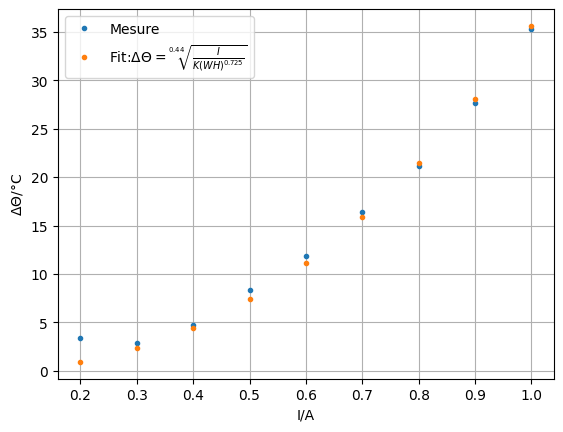

In [14]:
I_reel = np.arange(0.2, 1.1, 0.1)
# Tau_Calc =
# plt.plot(Tau_list, label="Mesures")
# plt.plot(I_reel, Delta_Theta_list, ".")


# plt.plot(I_reel, Top, "*", label="$T = f(I)$")
# print(df)
# Ajustement et affichage du fit
# df["CH 1"] -= df["CH 1"].min()
def func_IPC(I, W, H):
    return (I / (0.048 * ((W * H) ** 0.725))) ** (1 / 0.44)


popt_IPC, pcov_IPC = curve_fit(func_IPC, I_reel, Delta_Theta_list)
perr = np.sqrt(np.diag(pcov))

# On sauvegarde les valeurs des coefficients dans des listes
W = popt_IPC[0]
H = popt_IPC[1]
# On sauvegarde les erreurs des coefficients dans des listes
DW = pcov_IPC[0]
DH = pcov_IPC[1]
# On génère les séries de fits pour les données
DT_calc = func_IPC(I_reel, W, H)
# On affiche les données
plt.figure()
plt.plot(I_reel, Delta_Theta_list, ".", label="Mesure")
plt.plot(
    I_reel,
    DT_calc,
    ".",
    label=r"Fit:$\Delta\Theta = \sqrt[0.44]{\frac{I}{K\left(W H\right)^{0.725}}} $",
)

plt.xlabel("I/A")

plt.ylabel("$\Delta\Theta$/°C")

plt.grid(True)

plt.legend()

plt.show
plt.savefig("Graphiques/I_reel_DeltaT.eps")
plt.savefig("Graphiques/I_reel_DeltaT.png")

print(W, H)
print(Delta_Theta_list)
print(DT_calc)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


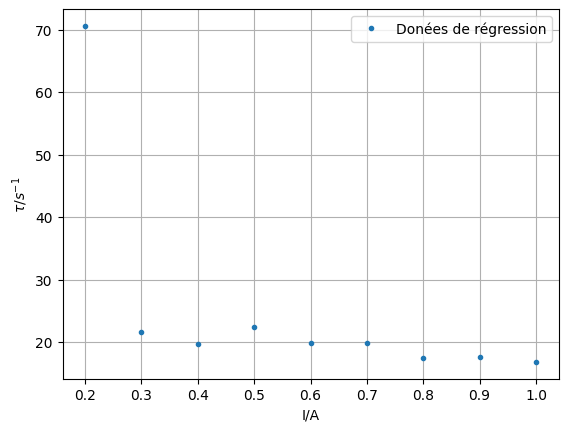

In [15]:
# On affiche les données
plt.figure()
plt.plot(I_reel, Tau_list, ".", label="Donées de régression")
# plt.plot(I_reel, Theta_amb_list, ".", label="Fit")

plt.xlabel("I/A")

plt.ylabel(r"$\tau/s^{-1}$")

plt.grid(True)

plt.legend()

plt.show
plt.savefig("Graphiques/Tau.eps")
plt.savefig("Graphiques/Tau.png")

# Régression automatisée des courbes $\Delta\Theta\left(t\right)$ à $\Theta_{cryogénique}$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

['Cryo0_1A.csv', 'Cryo0_2A.csv', 'Cryo0_3A.csv', 'Cryo0_4A.csv', 'Cryo0_5A_2.csv', 'Cryo1_0A.csv', 'Cryo1_5A.csv', 'Cryo2_0A.csv']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


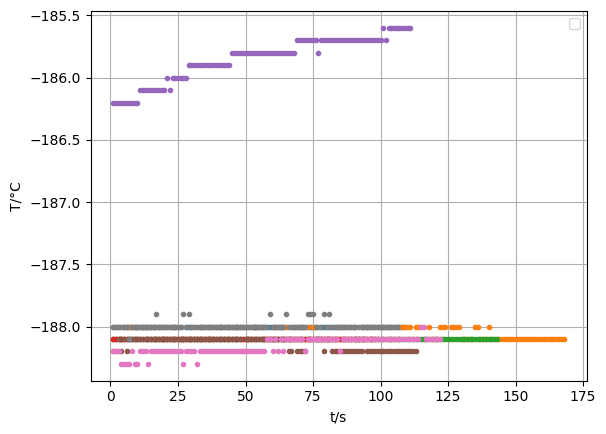

In [16]:
# Import of the strings of the files
# Path to files to import
path = "Donnees/Cryo/"

filelist = os.listdir(path)
# On vérifie qu'on a la bonne liste
print(filelist)
# Création de la dataframe
df_list_cryo = []

# popt, pcov = curve_fit(func, Amb0_6["No."], Amb0_6["CH 1"])

# Calcul de l'erreur
# perr = np.sqrt(np.diag(pcov))

# Theta_amb_fit = popt[0]
# Delta_Theta_fit = popt[1]
# Tau_fit = popt[2]
# print(Tau_fit, Theta_amb_fit, Delta_Theta_fit)
# xfit = Amb0_6["No."]

# yfit = func(xfit, Theta_amb_fit, Delta_Theta_fit, Tau_fit)

# On met tout dans une liste d'array
for file in filelist:
    df_list_cryo.append(pd.read_csv(path + file, skiprows=10, sep=";"))

for df in df_list_cryo:

    plt.plot(df["No."], df["CH 1"], ".")

    # plt.plot(df["No."], y)

    plt.xlabel("t/s")

    plt.ylabel("T/°C")

    plt.grid(True)

    plt.legend(loc="upper right")

    plt.show